### This Notebook is dedicated to Visualization of the Project
#### Visualize key insights from movie data analysis

#### This notebook includes:
##### 1. Revenue vs. Budget Trends
##### 2. ROI Distribution by Genre
##### 3. Popularity vs. Rating Analysis
##### 4. Yearly Box Office Performance Trends
##### 5. Franchise vs. Standalone Success Comparison

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load cleaned data
df = pd.read_csv('../data/final/movies_with_kpis.csv')

print(f"Dataset loaded: {df.shape}")
print(f"Visualization setup complete")

# Create figures directory
import os
os.makedirs('../reports/figures', exist_ok=True)

Dataset loaded: (18, 32)
Visualization setup complete


#### 1. Revenue vs. Budget Trends

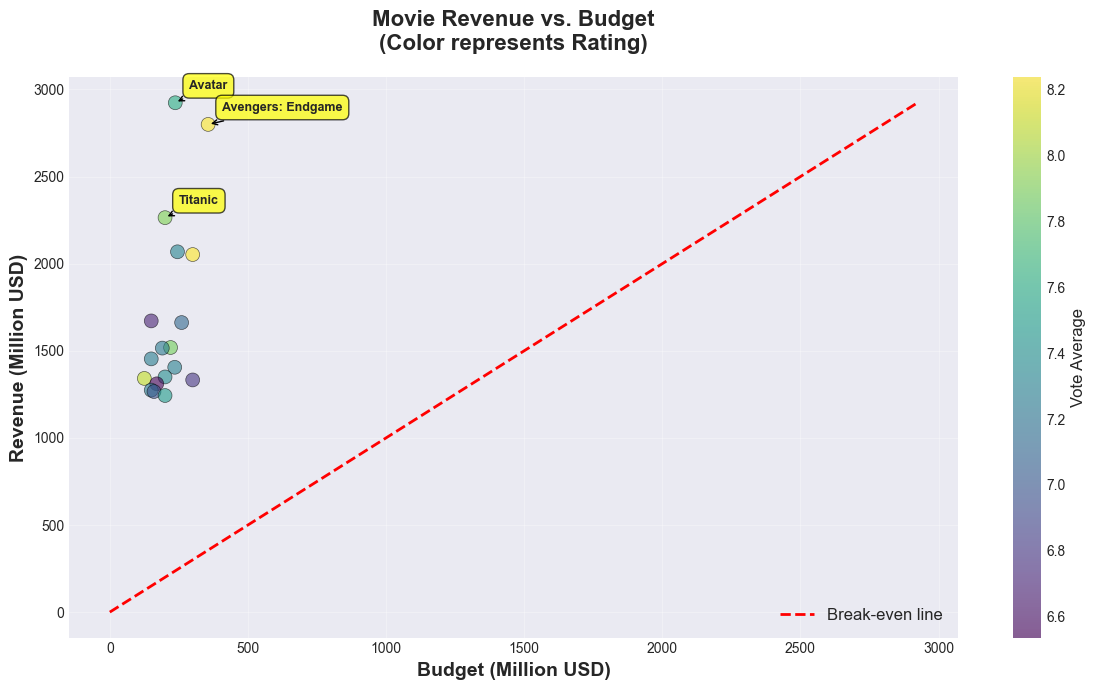

Revenue vs Budget plot
Figure saved to ../reports/figures/revenue_vs_budget.png


In [2]:
# Revenue vs Budget Scatter Plot
plt.figure(figsize=(12, 7))

# scatter plot
plt.scatter(df['budget_musd'], df['revenue_musd'], 
           alpha=0.6, s=100, c=df['vote_average'], 
           cmap='viridis', edgecolors='black', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Vote Average', fontsize=12)

# Add break-even line
max_val = max(df['budget_musd'].max(), df['revenue_musd'].max())
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Break-even line')

# Labels and title
plt.xlabel('Budget (Million USD)', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (Million USD)', fontsize=14, fontweight='bold')
plt.title('Movie Revenue vs. Budget\n(Color represents Rating)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate top movies
top_movies = df.nlargest(3, 'revenue_musd')
for idx, row in top_movies.iterrows():
    plt.annotate(row['title'], 
                xy=(row['budget_musd'], row['revenue_musd']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('../reports/figures/revenue_vs_budget.png', dpi=300, bbox_inches='tight')
plt.show()

print("Revenue vs Budget plot")
print("Figure saved to ../reports/figures/revenue_vs_budget.png")

#### 2. ROI Distribution by Genre

In [3]:
# Prepare and Extract individual genres for ROI Analysis
genre_roi_data = []

for idx, row in df.iterrows():
    if pd.notna(row['genres']) and pd.notna(row['roi']):
        genres = row['genres'].split('|')
        for genre in genres:
            genre_roi_data.append({
                'genre': genre.strip(),
                'roi': row['roi']
            })

genre_roi_df = pd.DataFrame(genre_roi_data)

# Get top 10 genres by count
top_genres = genre_roi_df['genre'].value_counts().head(10).index
genre_roi_filtered = genre_roi_df[genre_roi_df['genre'].isin(top_genres)]

print(f"Genres analyzed: {len(top_genres)}")
print(f"Total genre-movie combinations: {len(genre_roi_filtered)}")

Genres analyzed: 10
Total genre-movie combinations: 59


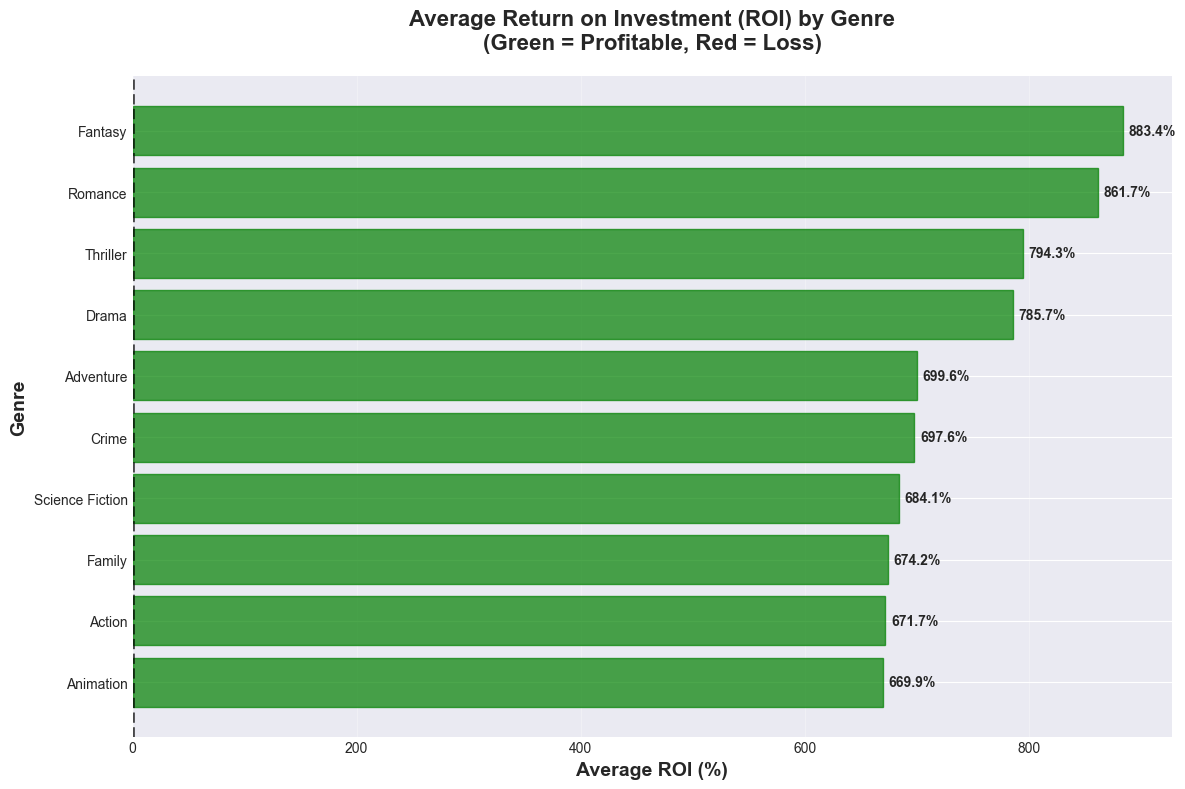

ROI by Genre plot
Figure saved to ../reports/figures/roi_by_genre.png


In [4]:
# ROI Bar Chart by Genre
plt.figure(figsize=(12, 8))

# Mean ROI per genre
genre_means = genre_roi_filtered.groupby('genre')['roi'].mean().sort_values(ascending=True)

# Horizontal bar chart
bars = plt.barh(genre_means.index, genre_means.values, 
                color='steelblue', edgecolor='black', alpha=0.7)

# Color bars based on positive/negative ROI
colors = ['green' if x > 0 else 'red' for x in genre_means.values]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Adding value labels
for i, v in enumerate(genre_means.values):
    plt.text(v + 5, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)

# Adding vertical line at 0
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.7)

# Labels and title
plt.xlabel('Average ROI (%)', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.title('Average Return on Investment (ROI) by Genre\n(Green = Profitable, Red = Loss)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../reports/figures/roi_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("ROI by Genre plot")
print("Figure saved to ../reports/figures/roi_by_genre.png")

#### Popularity vs Rating 

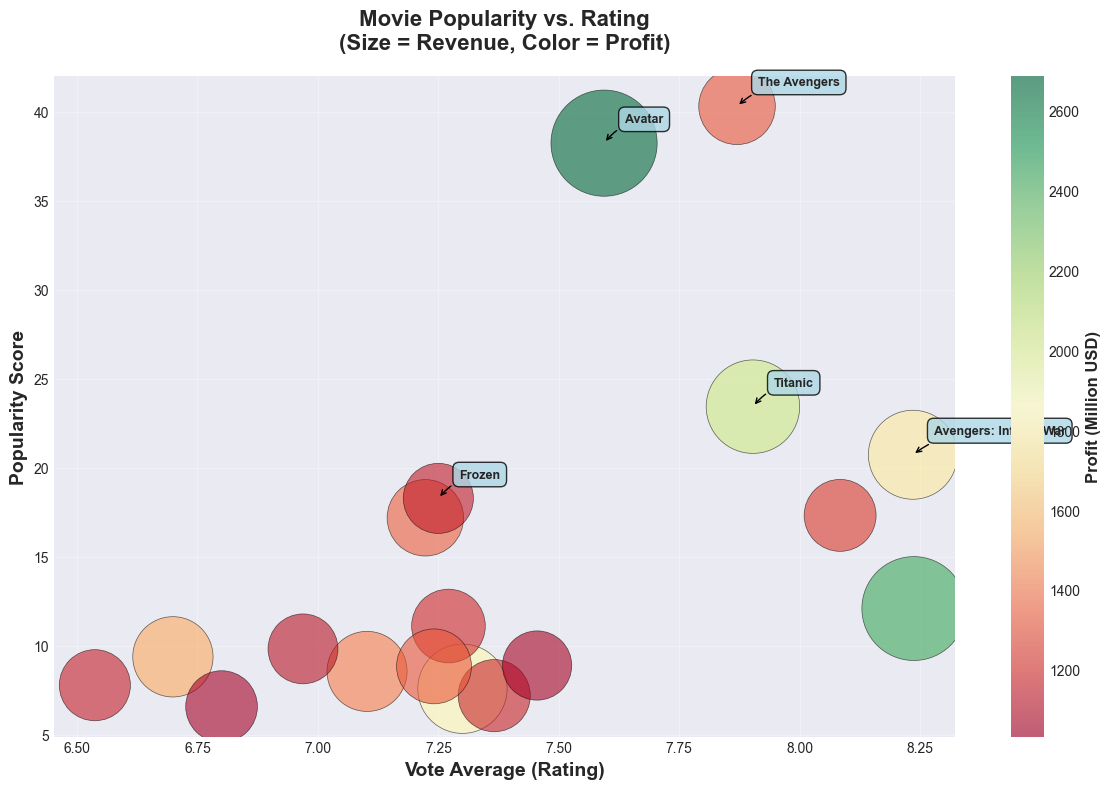

Popularity vs Rating plot
Figure saved to ../reports/figures/popularity_vs_rating.png


In [5]:
# Popularity vs Rating Scatter with Density
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
scatter = ax.scatter(df['vote_average'], df['popularity'], 
                    s=df['revenue_musd']*2, # Size by revenue
                    c=df['profit_musd'], # Color by profit
                    cmap='RdYlGn', alpha=0.6, 
                    edgecolors='black', linewidth=0.5)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Profit (Million USD)', fontsize=12, fontweight='bold')

# Labels and title
ax.set_xlabel('Vote Average (Rating)', fontsize=14, fontweight='bold')
ax.set_ylabel('Popularity Score', fontsize=14, fontweight='bold')
ax.set_title('Movie Popularity vs. Rating\n(Size = Revenue, Color = Profit)', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Annotate highly popular movies
popular_movies = df.nlargest(5, 'popularity')
for idx, row in popular_movies.iterrows():
    ax.annotate(row['title'], 
               xy=(row['vote_average'], row['popularity']),
               xytext=(15, 15), textcoords='offset points',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

plt.tight_layout()
plt.savefig('../reports/figures/popularity_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("Popularity vs Rating plot")
print("Figure saved to ../reports/figures/popularity_vs_rating.png")

In [7]:
# 
print("Sample budget values:")
print(df['budget_musd'].head(10))
print(f"\nMin: {df['budget_musd'].min()}")
print(f"Max: {df['budget_musd'].max()}")
print(f"Mean: {df['budget_musd'].mean()}")

Sample budget values:
0    356.0
1    237.0
2    245.0
3    300.0
4    200.0
5    150.0
6    260.0
7    220.0
8    190.0
9    235.0
Name: budget_musd, dtype: float64

Min: 125.0
Max: 356.0
Mean: 213.77777777777777


#### Yearly Box Office Performance Trends 

In [10]:

# Converting release_date to datetime to extract year
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

# Group by year
yearly_stats = df.groupby('year').agg({
    'revenue_musd': ['sum', 'mean', 'count'],
    'budget_musd': ['sum', 'mean'],
    'vote_average': 'mean'
}).round(2)

yearly_stats.columns = ['Total_Revenue', 'Avg_Revenue', 'Movie_Count', 
                        'Total_Budget', 'Avg_Budget', 'Avg_Rating']

print(yearly_stats.head(10).to_markdown())

|   year |   Total_Revenue |   Avg_Revenue |   Movie_Count |   Total_Budget |   Avg_Budget |   Avg_Rating |
|-------:|----------------:|--------------:|--------------:|---------------:|-------------:|-------------:|
|   1997 |         2264.16 |       2264.16 |             1 |            200 |       200    |         7.9  |
|   2009 |         2923.71 |       2923.71 |             1 |            237 |       237    |         7.59 |
|   2011 |         1341.51 |       1341.51 |             1 |            125 |       125    |         8.08 |
|   2012 |         1518.82 |       1518.82 |             1 |            220 |       220    |         7.87 |
|   2013 |         1274.22 |       1274.22 |             1 |            150 |       150    |         7.25 |
|   2015 |         6660.56 |       1665.14 |             4 |            820 |       205    |         7.12 |
|   2017 |         2598.81 |       1299.41 |             2 |            460 |       230    |         6.88 |
|   2018 |         5956.04 |

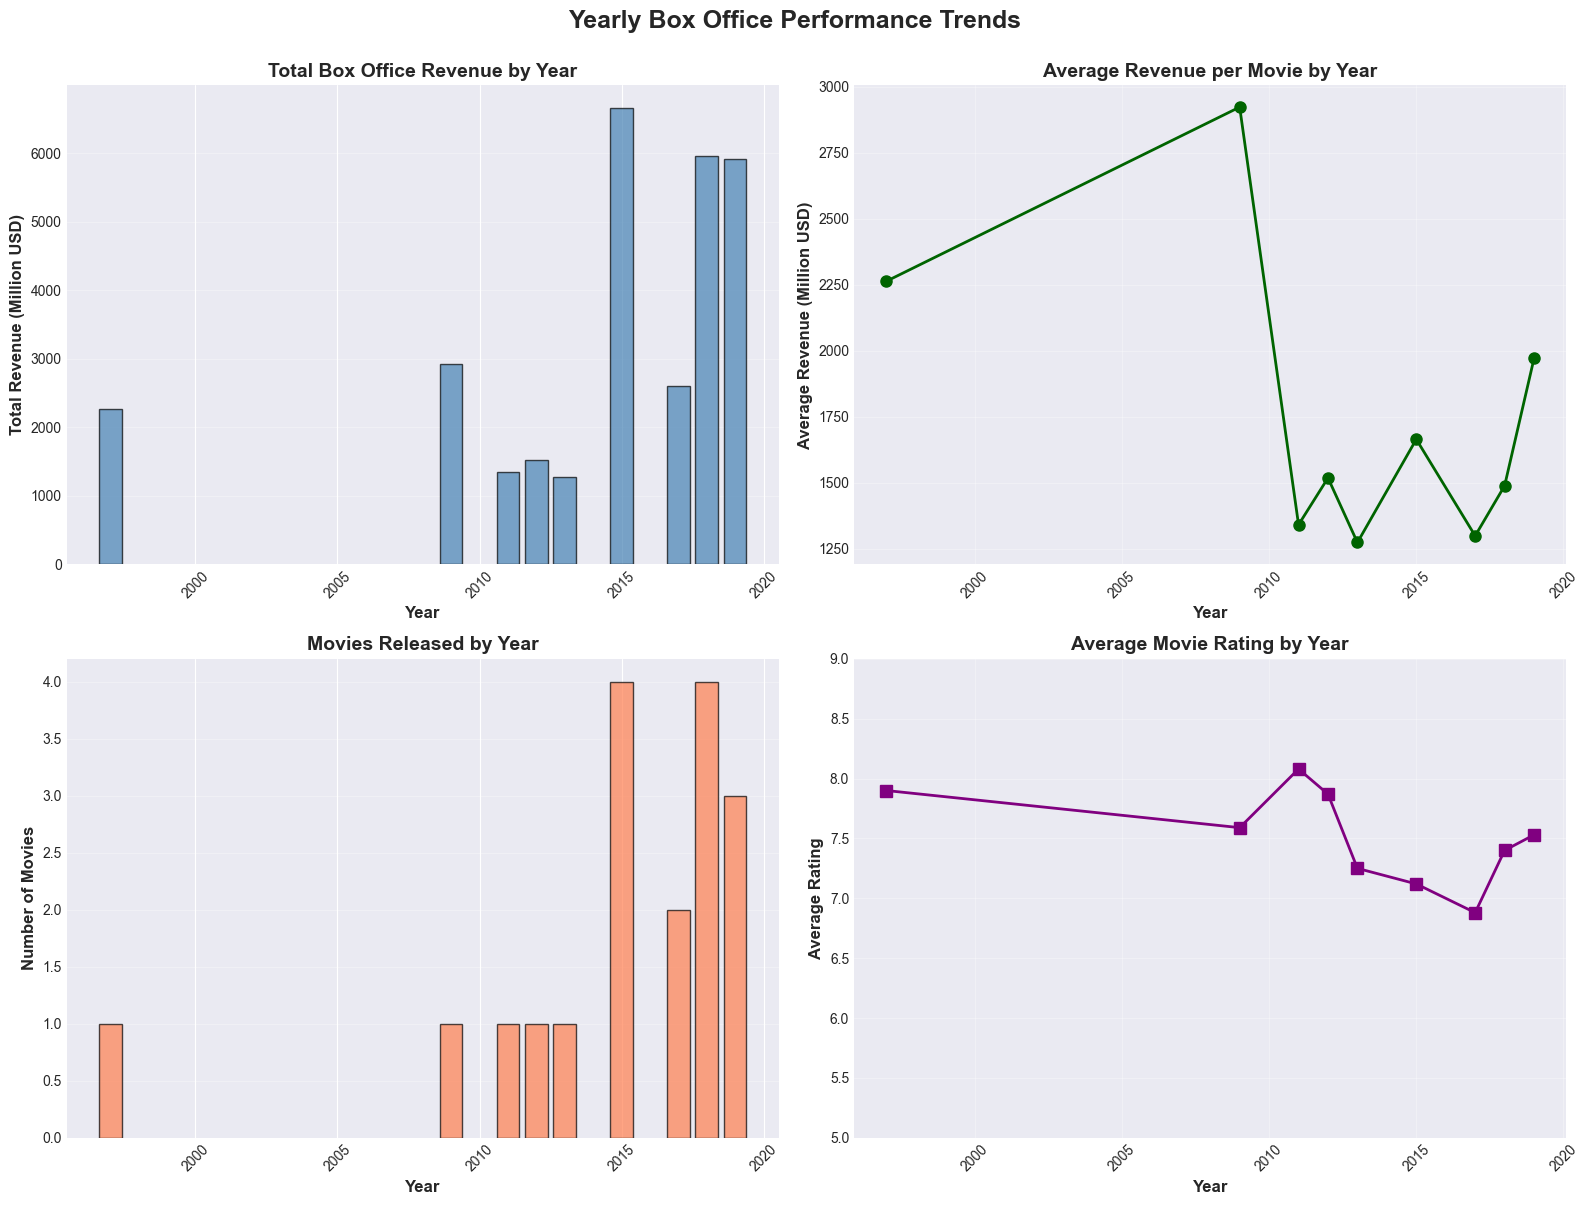

early trends plot


In [11]:
# Yearly Revenue Trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Revenue by Year
axes[0, 0].bar(yearly_stats.index, yearly_stats['Total_Revenue'], 
              color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total Revenue (Million USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Total Box Office Revenue by Year', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Average Revenue per Movie by Year
axes[0, 1].plot(yearly_stats.index, yearly_stats['Avg_Revenue'], 
               marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[0, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Revenue (Million USD)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Revenue per Movie by Year', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Number of Movies Released by Year
axes[1, 0].bar(yearly_stats.index, yearly_stats['Movie_Count'], 
              color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Movies', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Movies Released by Year', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Average Rating by Year
axes[1, 1].plot(yearly_stats.index, yearly_stats['Avg_Rating'], 
               marker='s', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Rating', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Movie Rating by Year', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim(5, 9)

plt.suptitle('Yearly Box Office Performance Trends', 
            fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../reports/figures/yearly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("early trends plot")

#### Franchise vs Standalone Comparison

In [16]:
# Calculate comparison metrics between franchise and standalone movies
comparison_metrics = df.groupby('is_franchise').agg({
    'revenue_musd': 'mean',
    'budget_musd': 'mean',
    'roi': 'median',
    'vote_average': 'mean',
    'popularity': 'mean'
}).round(2)

# Renaming index better labesl
comparison_metrics.index = ['Standalone', 'Franchise']

print("Franchise vs Standalone Comparison:")
print(comparison_metrics.to_string())

Franchise vs Standalone Comparison:
            revenue_musd  budget_musd     roi  vote_average  popularity
Standalone       1765.14        180.0  861.70          7.44       16.63
Franchise        1682.67        218.0  678.61          7.39       15.00


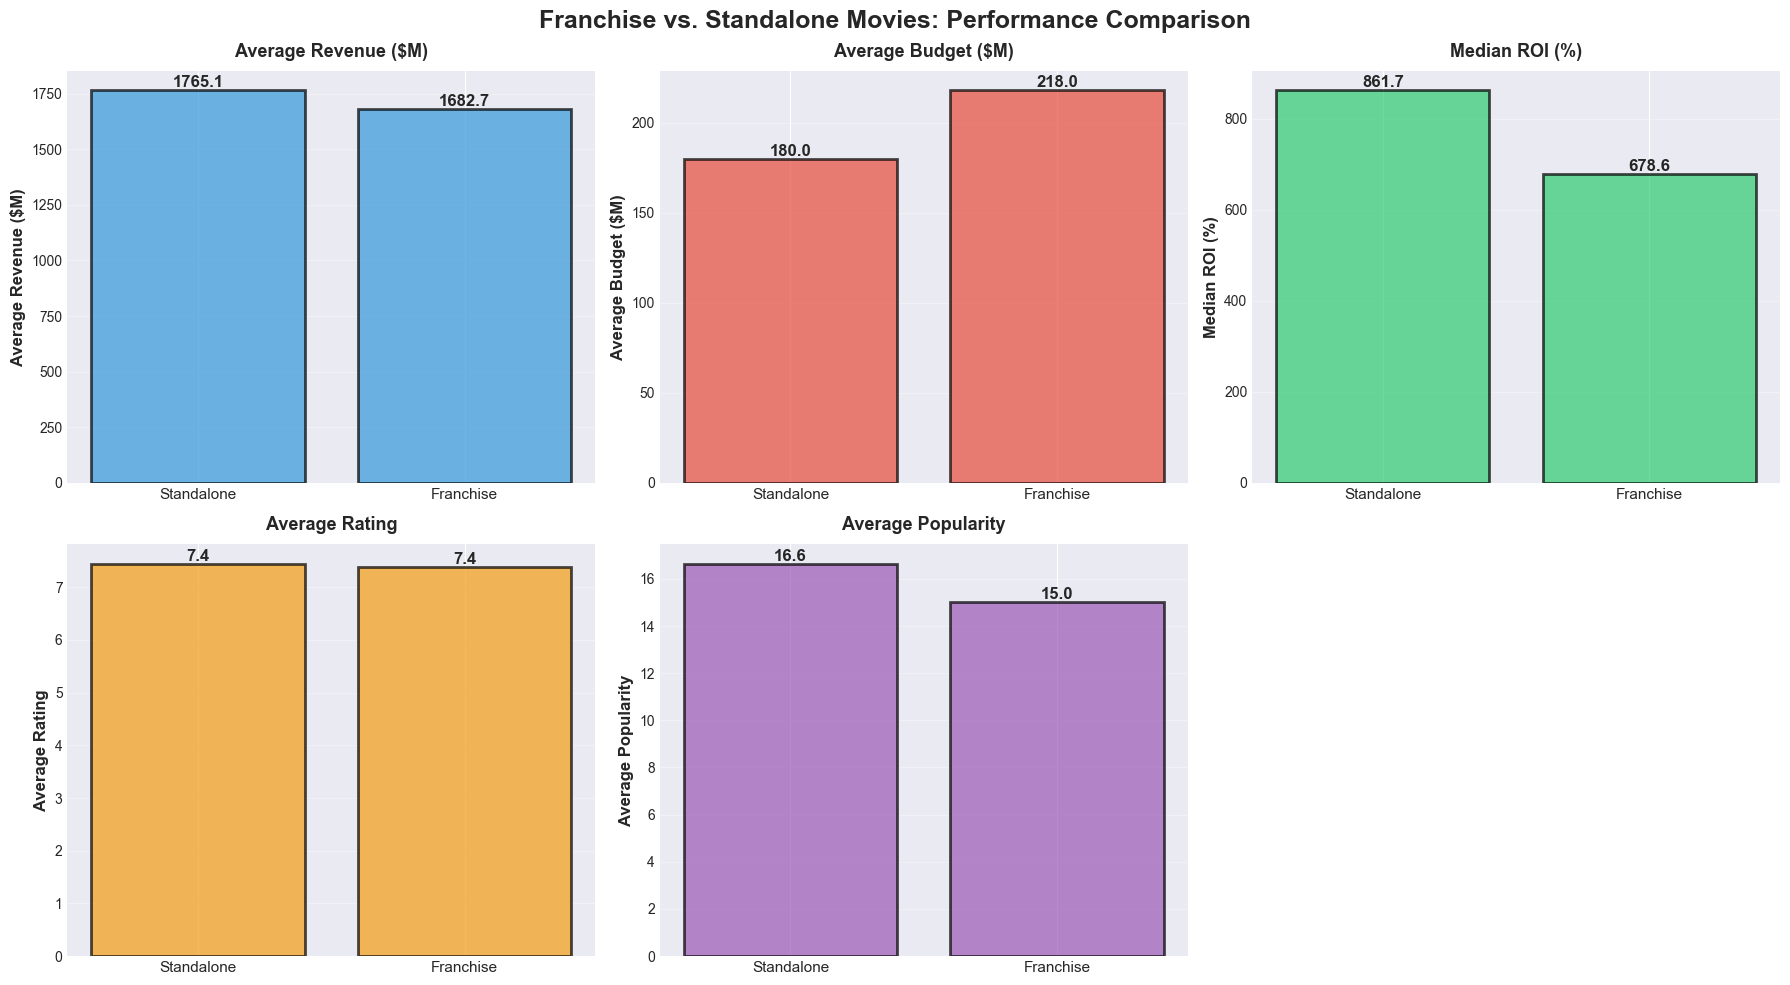

Franchise comparison vs standalone plot


In [18]:
# Bar Charts Comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['revenue_musd', 'budget_musd', 'roi', 'vote_average', 'popularity']
titles = ['Average Revenue ($M)', 'Average Budget ($M)', 'Median ROI (%)', 
          'Average Rating', 'Average Popularity']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    row = idx // 3
    col = idx % 3
    
    ax = axes[row, col]
    
    # Bar chart
    bars = ax.bar(comparison_metrics.index, comparison_metrics[metric], 
                  color=[color, color], edgecolor='black', alpha=0.7, linewidth=2)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}',
               ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.set_ylabel(title, fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', labelsize=11)

# Hide the last subplot (since we have 5 metrics in 2x3 grid)
axes[1, 2].axis('off')

plt.suptitle('Franchise vs. Standalone Movies: Performance Comparison', 
            fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('../reports/figures/franchise_vs_standalone.png', dpi=300, bbox_inches='tight')
plt.show()

print("Franchise comparison vs standalone plot")

### Top Genre Distribution (Extra)

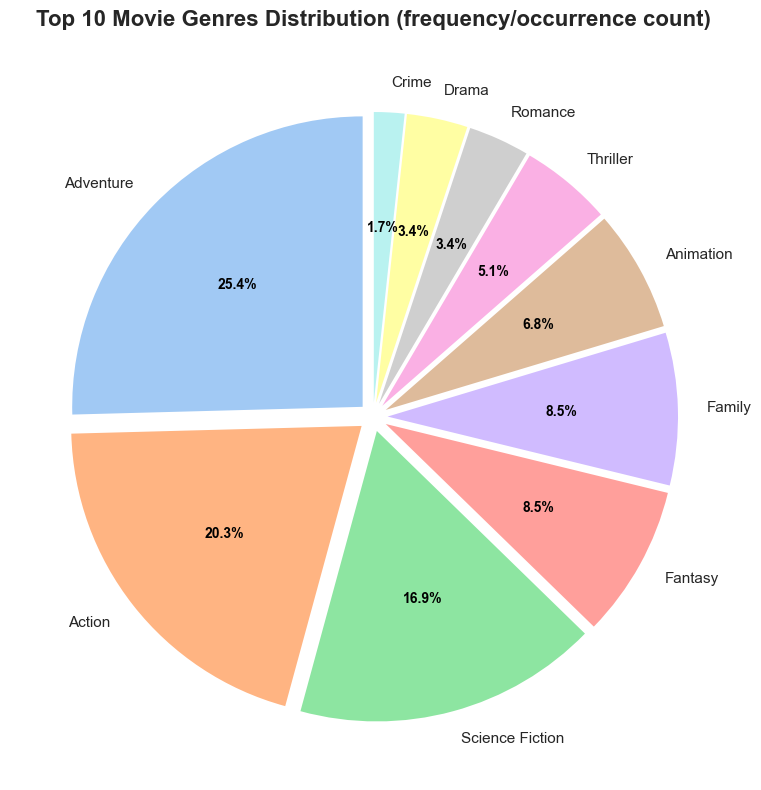

Genre distribution plot


In [20]:
# Top Genres Pie Chart
# Extracting all genres
all_genres = []
for genres in df['genres'].dropna():
    all_genres.extend([g.strip() for g in genres.split('|')])

genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:10]

wedges, texts, autotexts = plt.pie(genre_counts, labels=genre_counts.index, 
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors, textprops={'fontsize': 11},
                                     explode=[0.05]*len(genre_counts))


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title('Top 10 Movie Genres Distribution (frequency/occurrence count)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/genre_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Genre distribution plot")

#### 7. Summary Report

In [21]:
# C Final Visualization Report
print("="*80)
print("VISUALIZATION SUMMARY REPORT")
print("="*80)
print("\nAll visualizations saved to: ../reports/figures/")
print("\nGenerated figures:")
print("1. revenue_vs_budget.png - Scatter plot showing budget-revenue relationship")
print("2. roi_by_genre.png - Box plot of ROI distribution across genres")
print("3. popularity_vs_rating.png - Relationship between popularity and ratings")
print("4. yearly_trends.png - Multi-panel view of yearly box office trends")
print("5. franchise_vs_standalone.png - Performance comparison bar charts")
print("6. genre_distribution.png - Pie chart of genre distribution")
print("\n" + "="*80)
print("VISUALIZATION COMPLETE!")
print("="*80)

VISUALIZATION SUMMARY REPORT

All visualizations saved to: ../reports/figures/

Generated figures:
1. revenue_vs_budget.png - Scatter plot showing budget-revenue relationship
2. roi_by_genre.png - Box plot of ROI distribution across genres
3. popularity_vs_rating.png - Relationship between popularity and ratings
4. yearly_trends.png - Multi-panel view of yearly box office trends
5. franchise_vs_standalone.png - Performance comparison bar charts
6. genre_distribution.png - Pie chart of genre distribution

VISUALIZATION COMPLETE!


In [22]:
# Exporting visualization metadata
import json
from datetime import datetime

viz_metadata = {
    "generation_date": datetime.now().isoformat(),
    "total_movies_analyzed": len(df),
    "visualizations_created": 6,
    "figures_location": "../reports/figures/",
    "key_insights": {
        "highest_revenue_movie": df.loc[df['revenue_musd'].idxmax(), 'title'],
        "most_popular_genre": genre_counts.index[0],
        "franchise_revenue_advantage": f"{comparison_metrics.loc['Franchise', 'revenue_musd'] - comparison_metrics.loc['Standalone', 'revenue_musd']:.2f}M"
    }
}

with open('../reports/visualization_metadata.json', 'w') as f:
    json.dump(viz_metadata, f, indent=2)

print("Visualization metadata")


Visualization metadata
